In [1]:
from systems.parse import parse
from systems.viz import as_dot
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
N_sim = 100

In [3]:
spec = """
InfrRoute(0.7)
Congestion(0.4)
Statut(0.1)

[Ext] > Car(5000) @ 200 * (InfrRoute + Statut - Congestion)

VitTP(0.2)

Car > [Ext] @ 20 * (VitTP) + 30
[Ext] > Statut @ 0.01 * (Car * 0.0001)
[Ext] > Congestion @ Car * 0.00005 + 0.001 - InfrRoute*0.01
Politique(0.5) 
[Ext] > InfrRoute @ 0-0.05*Politique
[Ext] > Politique @ 0.1 * Congestion

[Ext] > GES(1500) @ 0.5 * Car + 100
GES > [Ext] @ 80

[Ext] > Pollution(0.2) @ 0.000001 * Car
[Ext] > CoutVie(0.4) @ 0.000001 * Car

InfrTP(0.6)
[Ext] > VitTP @ 0.05*InfrTP
[Ext] > VitTP @ 0-0.02*Congestion

Mob(1000)
TP(3000)
[Ext] > TP @ Mob*0.016 + 120*VitTP
TP > [Ext] @ 15
Mob > [Ext] @ 10
InfMob(0.5)
[Ext] > Mob @ 0.0005*TP + 50 * InfMob

Sante(0.6)
[Ext] > Sante @ 0.0001*Mob
[Ext] > CoutVie @ 0-0.0005*Mob

[Ext] > QOL(100) @ (Sante+VitTP-Pollution-CoutVie+Statut-Congestion)*10
QOL > [Ext] @ 0-0.2
"""
model = parse(spec)

In [4]:
results = model.run(rounds=N_sim)

In [5]:
before = pd.DataFrame(results)
before

,InfrRoute,Congestion,Statut,Ext,Car,VitTP,Politique,GES,Pollution,CoutVie,InfrTP,Mob,TP,InfMob,Sante,QOL
0,0.7,0.4,0.100000,inf,5000.000000,0.20,0.50,1500.000000,0.200000,0.400000,0.6,1000.000000,3000.000000,0.5,0.600000,100.000000
1,0.7,0.4,0.105000,inf,5046.000000,0.23,0.54,4020.000000,0.205000,0.405000,0.6,1015.750000,3012.168000,0.5,0.700000,100.000000
2,0.7,0.4,0.110046,inf,5092.400000,0.26,0.58,6563.000000,0.210046,0.410046,0.6,1031.503042,3028.469160,0.5,0.801575,100.250000
3,0.7,0.4,0.115138,inf,5139.209200,0.29,0.62,9129.200000,0.215138,0.415138,0.6,1047.260159,3048.918613,0.5,0.904725,101.765290
4,0.7,0.4,0.120278,inf,5186.436880,0.32,0.66,11718.804600,0.220278,0.420278,0.6,1063.022389,3073.531500,0.5,1.009451,104.561159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.7,0.4,0.884314,inf,12952.468472,3.08,4.34,395577.137810,0.984314,1.184314,0.6,2686.707991,25339.200082,0.5,17.792684,7946.604800
97,0.7,0.4,0.897267,inf,13097.731327,3.11,4.38,402073.372046,0.997267,1.197267,0.6,2708.042791,25825.708252,0.5,18.061354,8138.488494
98,0.7,0.4,0.910364,inf,13244.984676,3.14,4.42,408642.237710,1.010364,1.210364,0.6,2729.499218,26318.162861,0.5,18.332159,8333.229372
99,0.7,0.4,0.923609,inf,13394.257571,3.17,4.46,415284.730048,1.023609,1.223609,0.6,2751.078759,26816.590502,0.5,18.605109,8530.847314


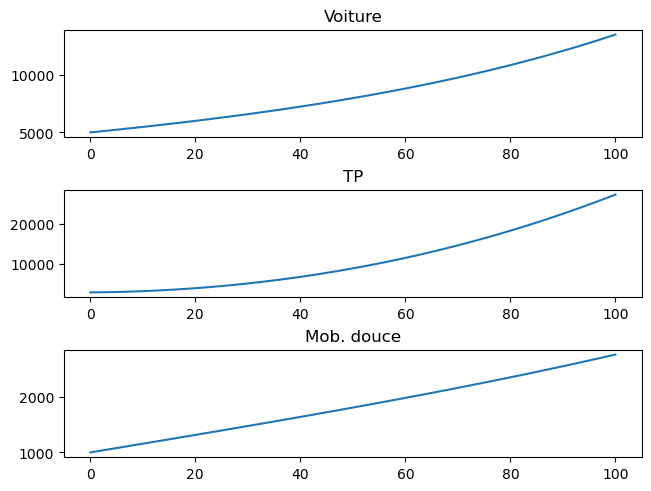

In [6]:
fig, axes = plt.subplots(3,1, constrained_layout=True)

#plot 1:
plt.subplot(3, 1, 1)
plt.plot(before['Car'])
plt.title("Voiture")

#plot 2:
plt.subplot(3, 1, 2)
plt.plot(before['TP'])
plt.title("TP")

#plot 3:
plt.subplot(3, 1, 3)
plt.plot(before['Mob'])
plt.title("Mob. douce")

plt.show()

In [7]:
spec = """
InfrRoute(0.7)
Congestion(0.4)
Statut(0.1)

[Ext] > Car(5000) @ 200 * (InfrRoute + Statut - Congestion)

VitTP(0.2)

Car > [Ext] @ 20 * (VitTP) + 30
[Ext] > Statut @ 0.01 * (Car * 0.0001)
[Ext] > Congestion @ Car * 0.00005 + 0.001 - InfrRoute*0.01
Politique(0.5) 
[Ext] > InfrRoute @ 0-0.05*Politique
[Ext] > Politique @ 0.1 * Congestion

[Ext] > GES(1500) @ 0.5 * Car + 100
GES > [Ext] @ 80

[Ext] > Pollution(0.2) @ 0.000001 * Car
[Ext] > CoutVie(0.4) @ 0.000001 * Car

InfrTP(0.6)
[Ext] > VitTP @ 0.05*InfrTP
[Ext] > VitTP @ 0-0.02*Congestion

Mob(1000)
TP(3000)
[Ext] > TP @ Mob*0.016 + 120*VitTP
TP > [Ext] @ 15
Mob > [Ext] @ 10
InfMob(0.5)
[Ext] > Mob @ 0.0005*TP + 50 * InfMob

Sante(0.6)
[Ext] > Sante @ 0.0001*Mob
[Ext] > CoutVie @ 0-0.0005*Mob

[Ext] > QOL(100) @ (Sante+VitTP-Pollution-CoutVie+Statut-Congestion)*10
QOL > [Ext] @ 0-0.2

[Ext] > VitTP @ 0.005 * Politique
[Ext] > InfMob @ 0.02 * Politique
[Ext] > InfrTP @ 0.02 * Politique
"""
model = parse(spec)

In [8]:
results = model.run(rounds=N_sim)

In [9]:
after = pd.DataFrame(results)
after

,InfrRoute,Congestion,Statut,Ext,Car,VitTP,Politique,GES,Pollution,CoutVie,InfrTP,Mob,TP,InfMob,Sante,QOL
0,0.7,0.4,0.100000,inf,5000.000000,0.20000,0.50,1500.000000,0.200000,0.400000,0.6000,1000.000000,3000.000000,0.5000,0.600000,100.000000
1,0.7,0.4,0.105000,inf,5046.000000,0.23250,0.54,4020.000000,0.205000,0.405000,0.6100,1015.750000,3012.168000,0.5100,0.700000,100.000000
2,0.7,0.4,0.110046,inf,5092.350000,0.26570,0.58,6563.000000,0.210046,0.410046,0.6208,1032.018103,3028.809390,0.5208,0.801575,100.275000
3,0.7,0.4,0.115138,inf,5139.045200,0.29964,0.62,9129.175000,0.215138,0.415138,0.6324,1048.846805,3050.038193,0.5324,0.904777,101.847290
4,0.7,0.4,0.120277,inf,5186.080070,0.33436,0.66,11718.697600,0.220277,0.420277,0.6448,1066.278725,3075.975474,0.5448,1.009661,104.740075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.7,0.4,0.776508,inf,7700.839531,12.22720,4.34,341673.790299,0.876508,1.076508,5.2080,14268.993430,95992.890684,5.1080,43.238309,15159.650173
97,0.7,0.4,0.784208,inf,7641.597047,12.50930,4.38,345544.210064,0.884208,1.084208,5.2948,14759.559273,100234.715715,5.1948,44.665208,15698.540187
98,0.7,0.4,0.791850,inf,7578.252731,12.79594,4.42,349385.008588,0.891850,1.091850,5.3824,15269.648924,104672.938304,5.2824,46.141164,16254.443186
99,0.7,0.4,0.799428,inf,7510.703934,13.08716,4.46,353194.134953,0.899428,1.099428,5.4708,15800.231088,109317.635937,5.3708,47.668129,16827.895728


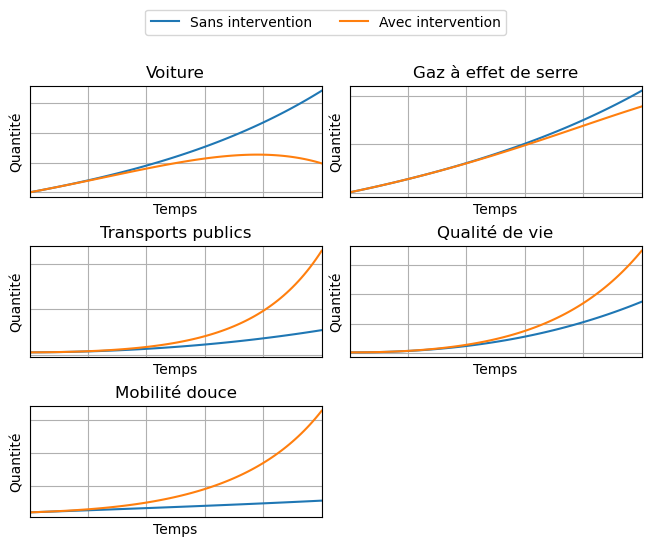

In [10]:
fig, (a1,a2,a3) = plt.subplots(3,2, constrained_layout=True)

#plot 1:
plt.subplot(3, 2, 1)
plt.plot(before['Car'])
plt.plot(after['Car'])
plt.title("Voiture")
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
plt.ylabel("Quantité")
plt.xlabel("Temps")
plt.xlim(0, len(before)-1)
plt.grid()

#plot 2:
plt.subplot(3, 2, 3)
plt.plot(before['TP'])
plt.plot(after['TP'])
plt.title("Transports publics")
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
plt.ylabel("Quantité")
plt.xlabel("Temps")
plt.xlim(0, len(before)-1)
plt.grid()

#plot 3:
plt.subplot(3, 2, 5)
plt.plot(before['Mob'], label="Sans intervention")
plt.plot(after['Mob'], label="Avec intervention")
plt.title("Mobilité douce")
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
plt.ylabel("Quantité")
plt.xlabel("Temps")
plt.xlim(0, len(before)-1)
plt.grid()

#plot 4:
plt.subplot(3, 2, 2)
plt.plot(before['GES'])
plt.plot(after['GES'])
plt.title("Gaz à effet de serre")
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
plt.ylabel("Quantité")
plt.xlabel("Temps")
plt.xlim(0, len(before)-1)
plt.grid()

#plot 5:
plt.subplot(3, 2, 4)
plt.plot(before['QOL'])
plt.plot(after['QOL'])
plt.title("Qualité de vie")
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
plt.ylabel("Quantité")
plt.xlabel("Temps")
plt.xlim(0, len(before)-1)
plt.grid()

#plot 6: 
plt.subplot(3,2,6)
plt.axis('off')

fig.legend(*a3[0].get_legend_handles_labels(), loc='upper center', ncol=4, bbox_to_anchor=(0., 1.02, 1., .102))

plt.show()